# Notebook configuration

In [1]:
run_number         = 4520
input_file_pattern = "/Users/Gonzalo/github/NEXTdata/Na22/{}/rwf/*.h5"    .format(run_number)
output_file_name   = "/Users/Gonzalo/github/NEXTdata/grassless_evts_{}.h5".format(run_number)

# Imports

In [6]:
import glob

import numpy             as np
import tables            as tb
import matplotlib.pyplot as plt

import invisible_cities.database.load_db           as     db
from   invisible_cities.core    .system_of_units_c import units
import invisible_cities.reco    .tbl_functions     as     tbl

## Plotting options

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 16, 12

# Initialization

In [4]:
active  = db.DataPMT(run_number).Active.values.astype(bool)
max_evt = 10

# Plot waveforms

1
2
3
4
5
6
7
8
9
10


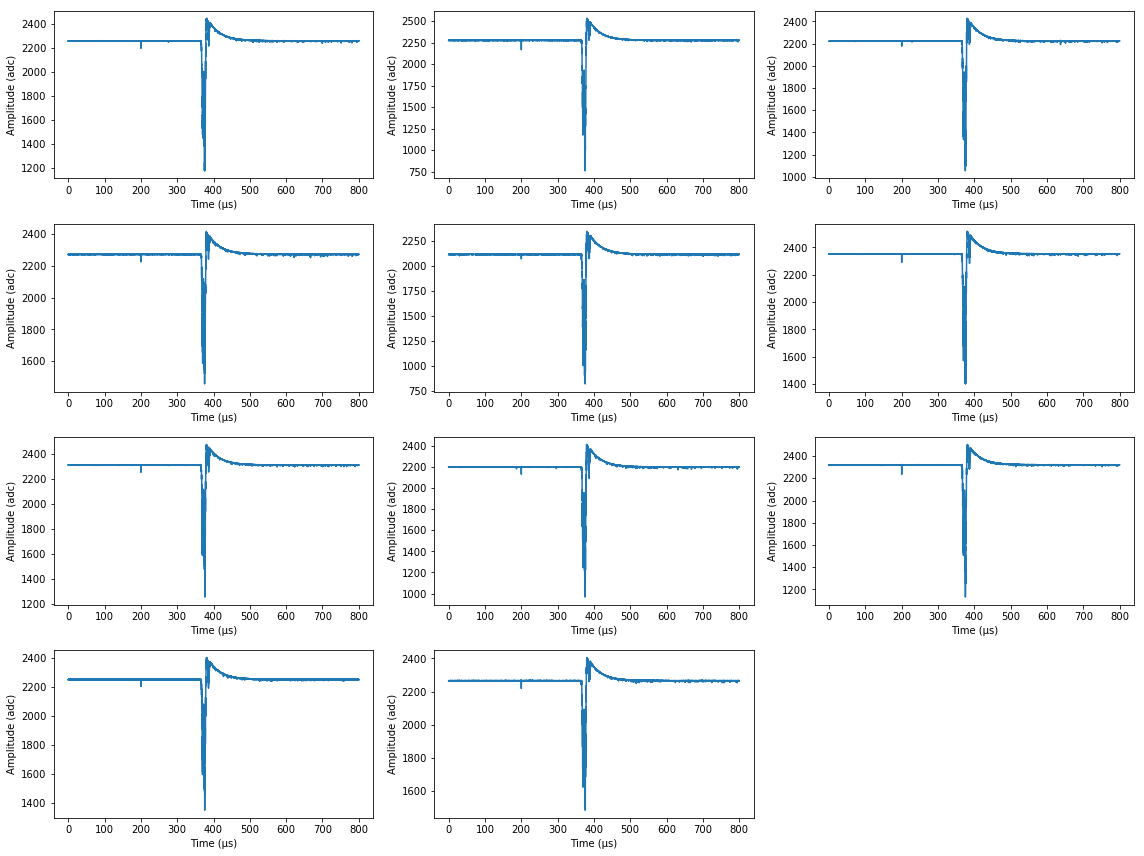

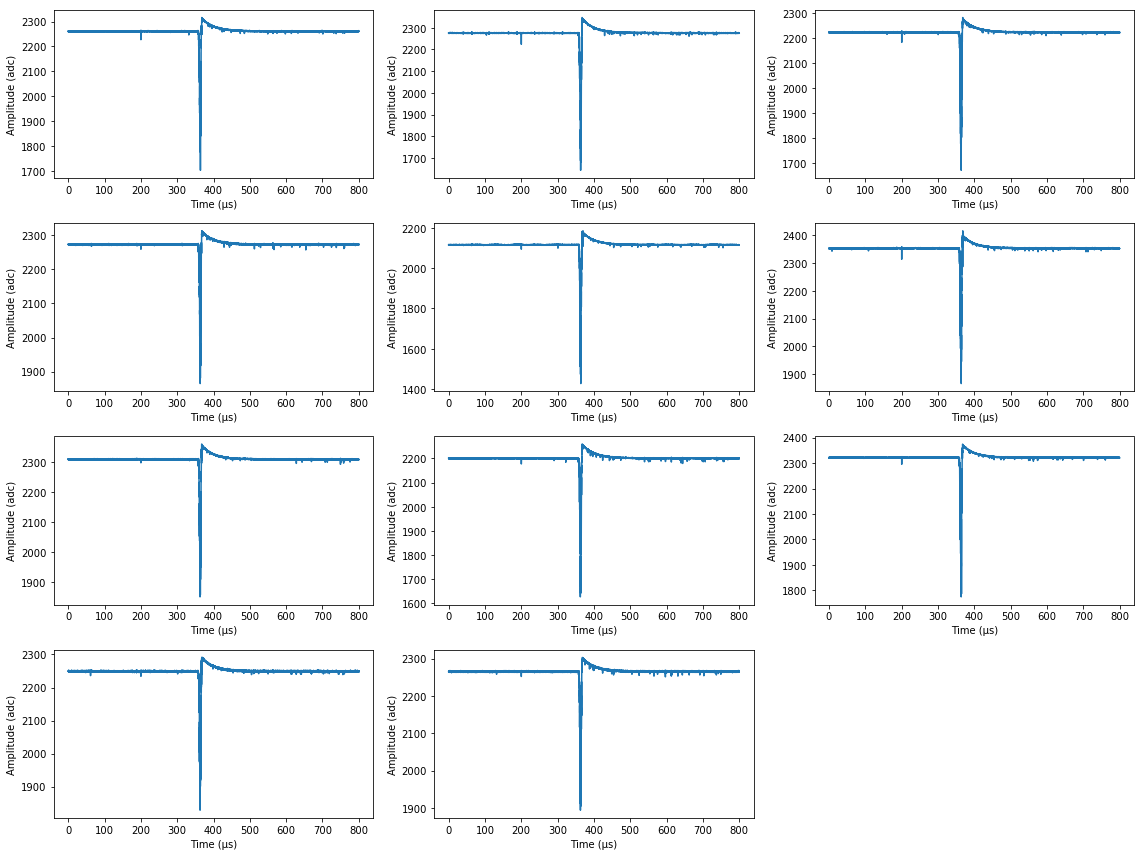

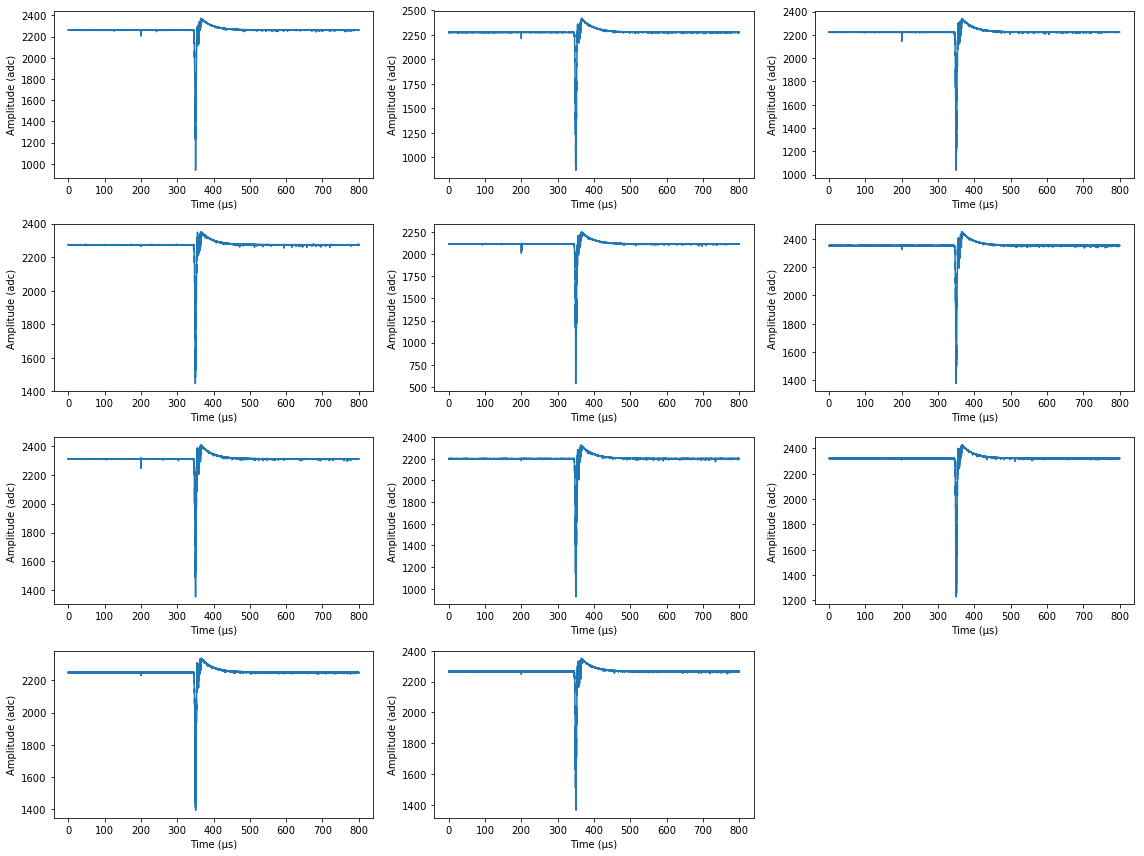

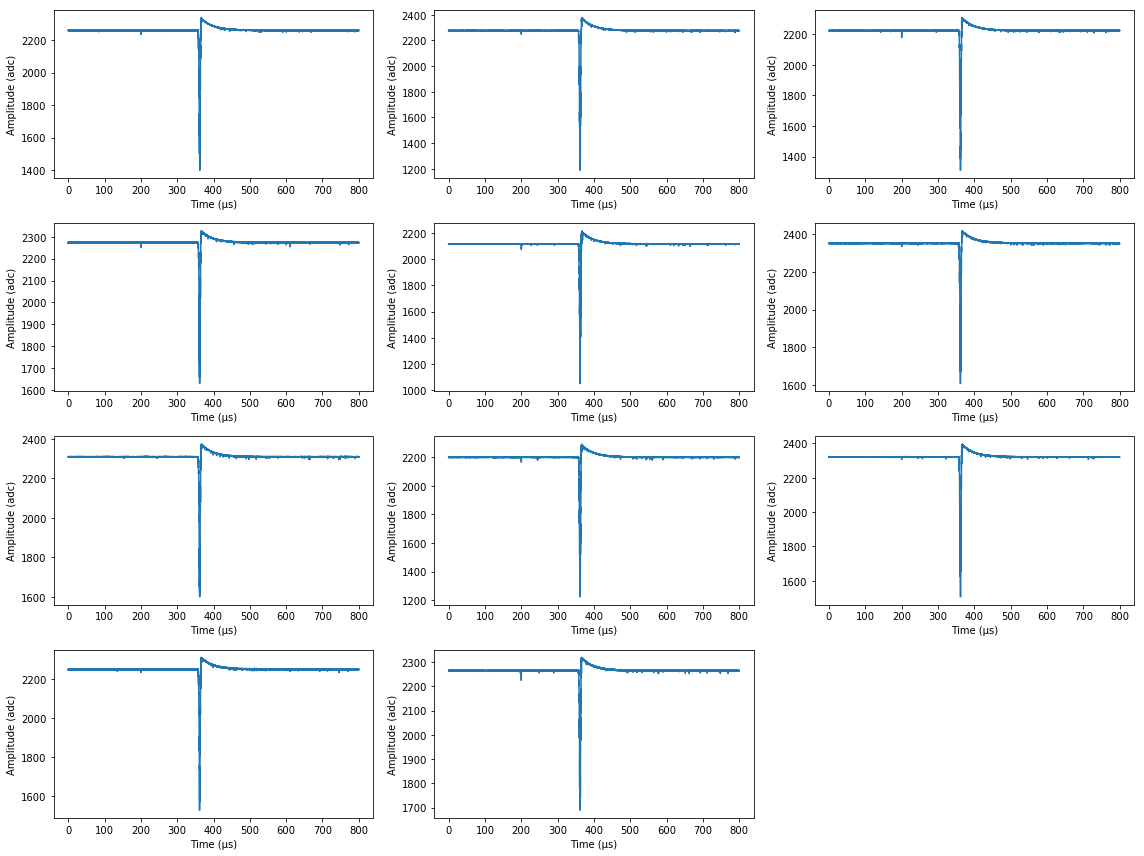

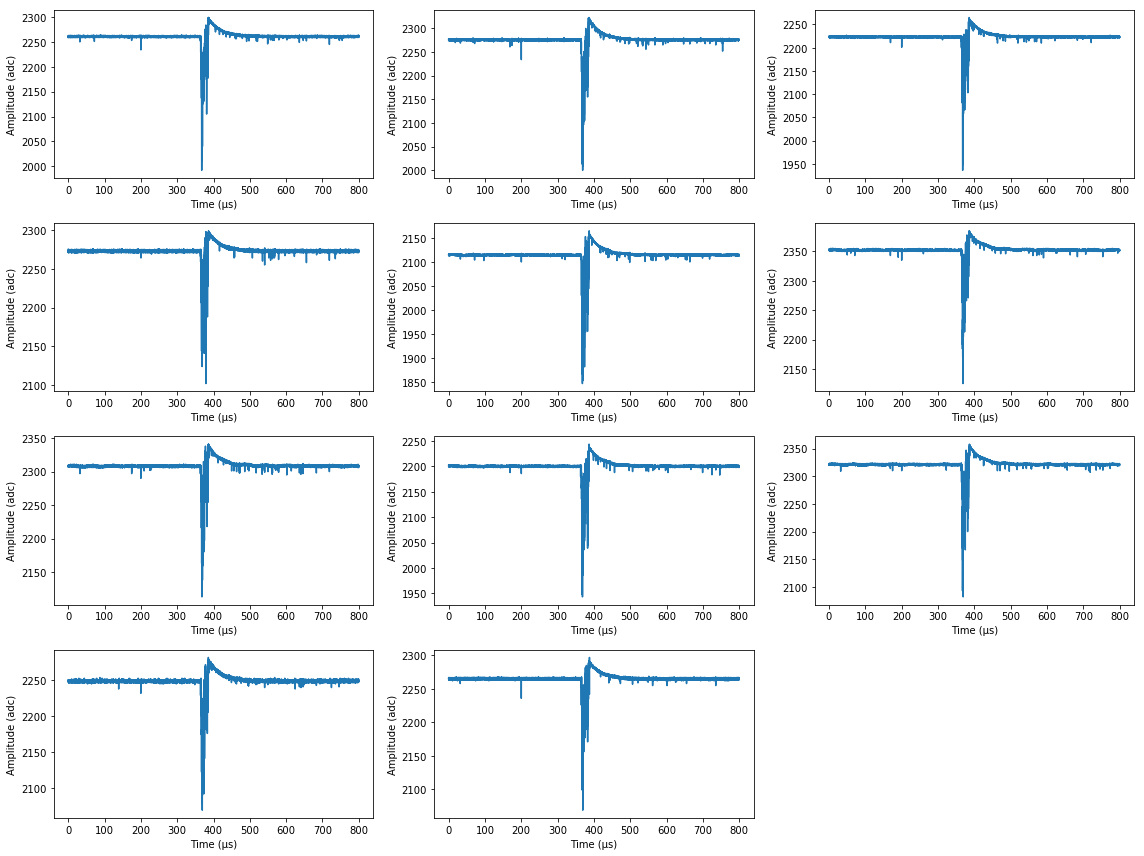

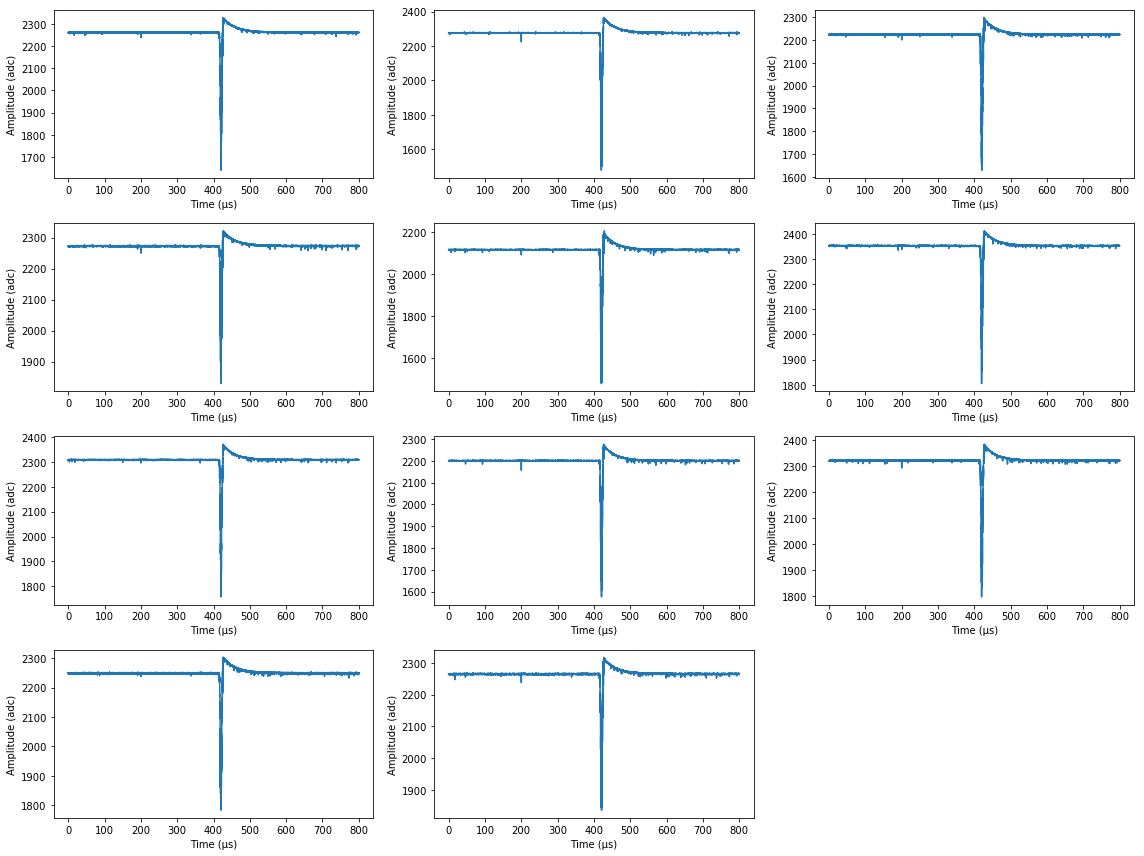

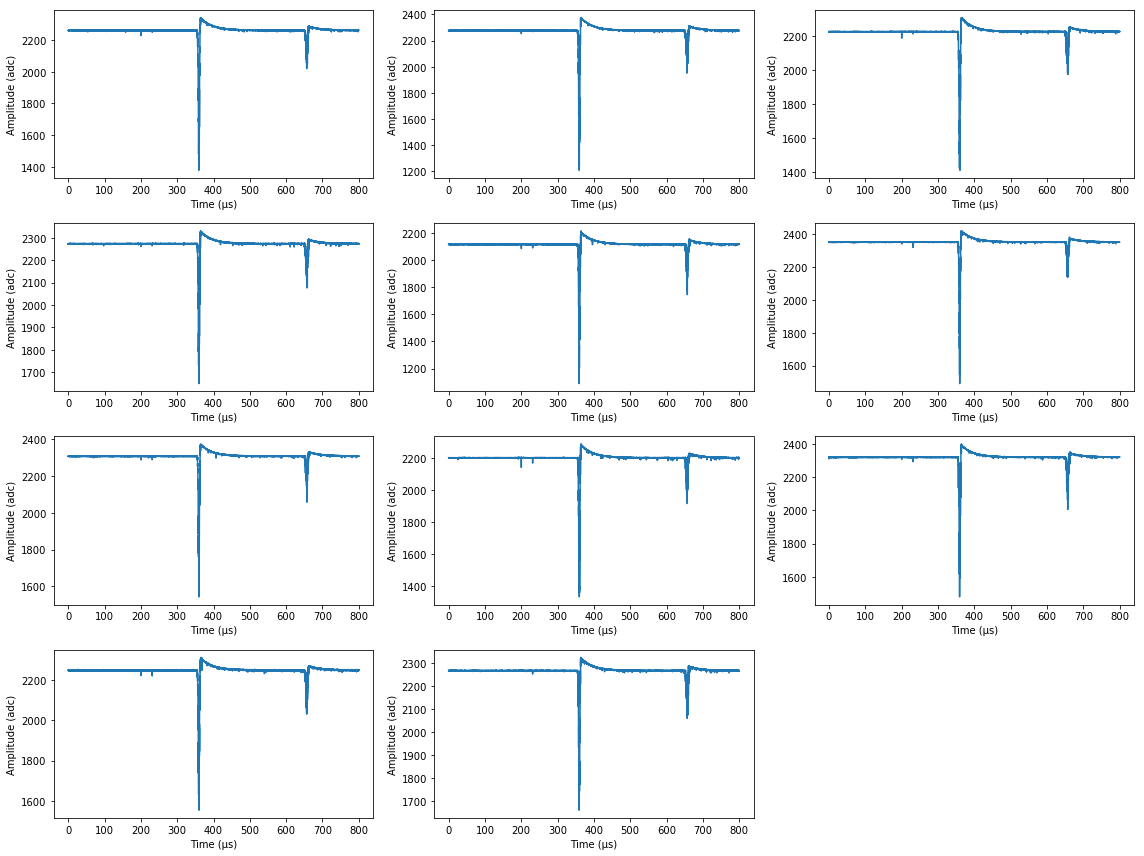

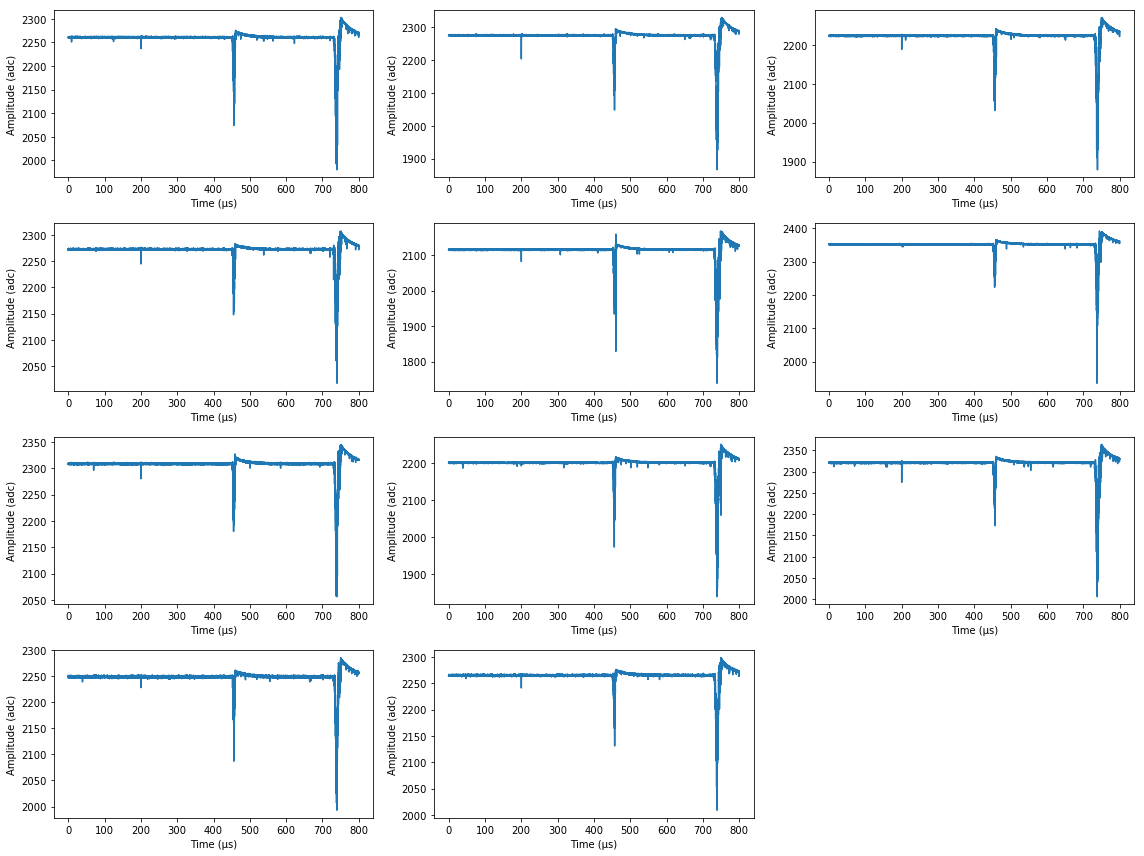

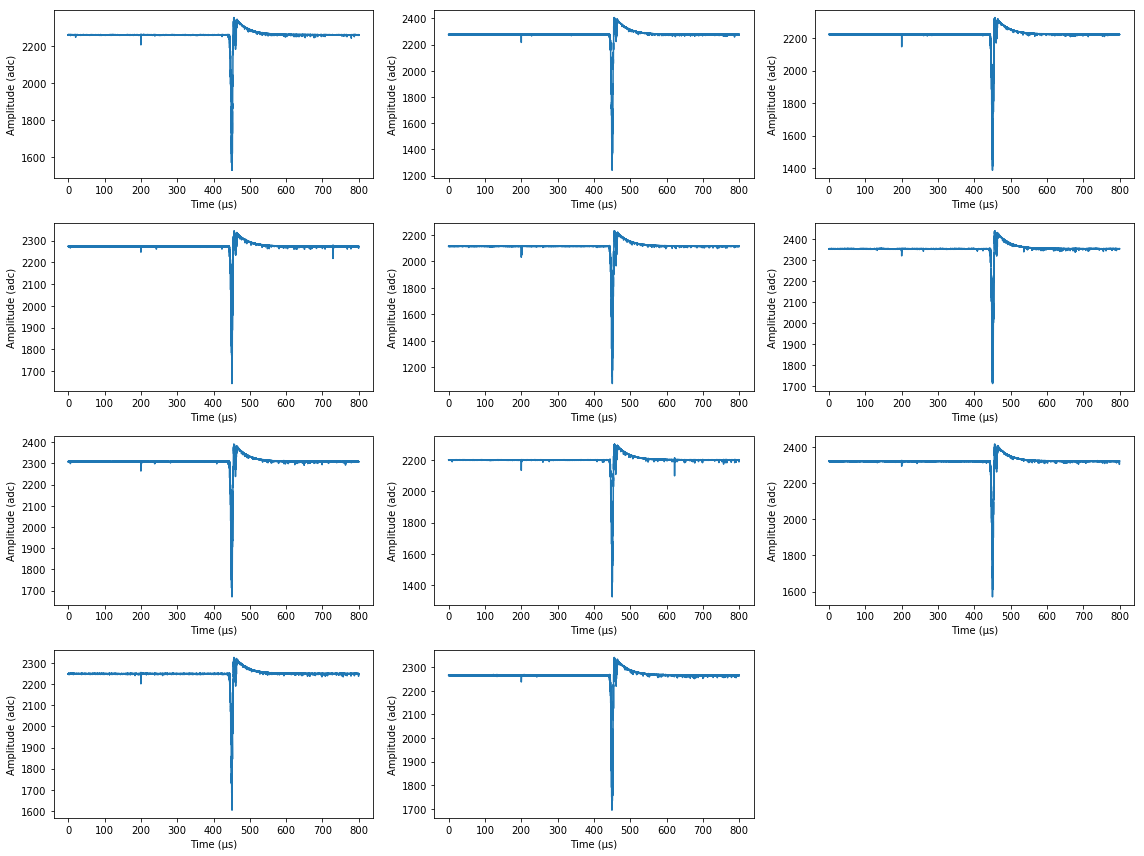

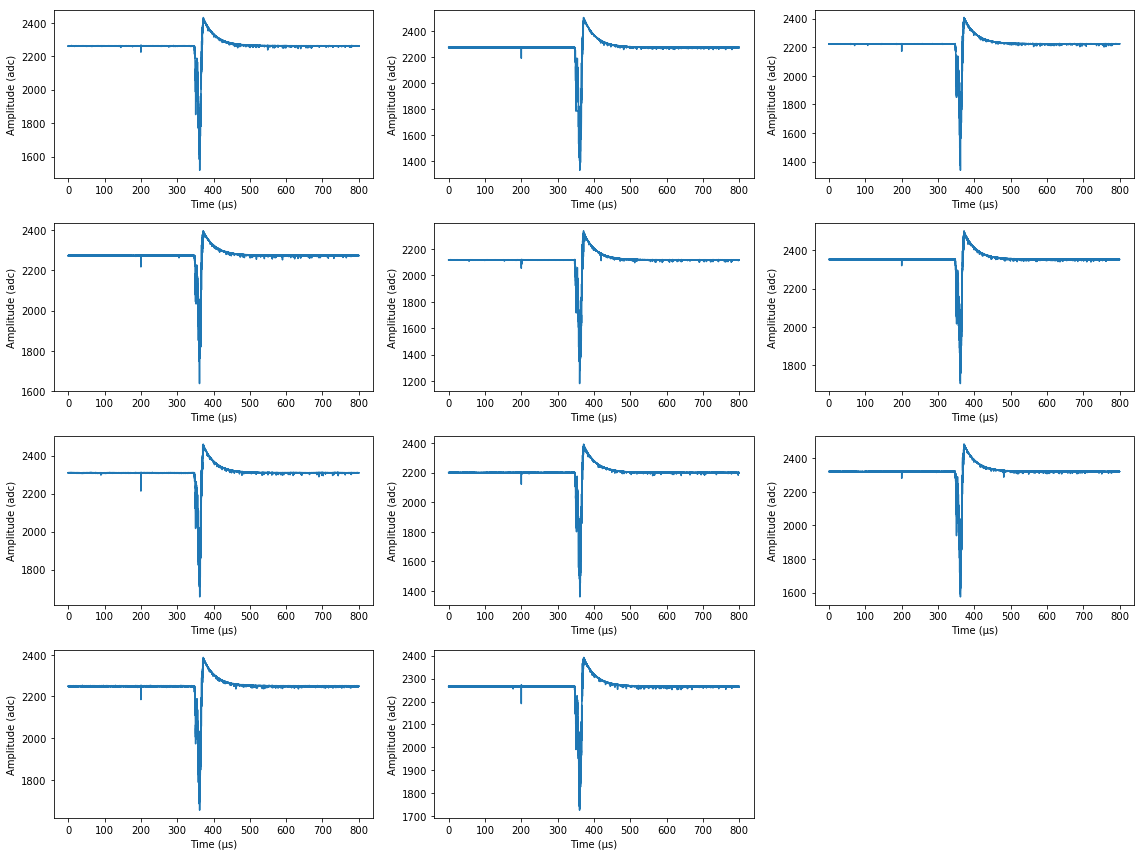

In [10]:
n = 0
for input_file_name in glob.glob(input_file_pattern):
    with tb.open_file(input_file_name) as h5in:
        pmtrwf  = tbl.get_rwf_vectors(h5in)[1].read()
        evt_nos = tbl.get_event_numbers_and_timestamps_from_file(h5in)[0]
        for evt, evt_no in enumerate(evt_nos):
            wf  = pmtrwf[evt, active, :]
            
            plt.figure()
            for i, pmt in enumerate(wf, start=1):
                plt.subplot(4, 3, i)
                plt.plot(np.arange(pmt.size)*25*units.ns/units.mus, pmt)
                plt.xlabel("Time (µs)")
                plt.ylabel("Amplitude (adc)")
            plt.tight_layout()

            n += 1
            print(n)
            if n >= max_evt:
                break
    if n >= max_evt:
        break